# Evolučné algoritmy a genetické programovanie

Jaroslav Loebl, jaroslavloebl@gmail.com, Objavovanie znalostí, 4.5.2018

Motivačné príklady
Reprodukcia obrazu https://www.youtube.com/watch?v=iV-hah6xs2A

Vozidlo https://www.youtube.com/watch?v=FKbarpAlBkw

Genetic Walkers https://www.youtube.com/watch?v=XiJ537K_9ww

Santa Fe https://www.youtube.com/watch?v=BKF7pGw8qbY 

In [1]:
%%HTML 
<iframe class='video' src="https://www.youtube.com/embed/iV-hah6xs2A" disablekb='1' frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

In [2]:
%%HTML 
<iframe class='video' src="https://www.youtube.com/embed/FKbarpAlBkw" disablekb='1' frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

In [3]:
%%HTML 
<iframe class='video' src="https://www.youtube.com/embed/XiJ537K_9ww" disablekb='1' frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

## Čo majú predchádzajúce videá spoločné?

# Evolučné algoritmy

# Základné princípy evolúcie

- populácia jedincov

![Beavers](beavers-1.png)

- prežijú tí najsilnejší (fitness)

![Beavers](beavers-2.png)

- výber jedincov pre párenie (selekcia)

![Beavers](beavers-3.png)

- reprodukcia (kríženie)

![Beavers](beavers-4.png)

- náhodná mutácia v genofonde potomka (mutácia)

![Beavers](beavers-5.png)

<div style="display: flex;">
<div>
<h1>Základné princípy evolúcie</h1>
<ul>
    <li>populácia jedincov</li>
    <li>prežijú tí najsilnejší (fitness)</li>
    <li>výber jedincov pre párenie (selekcia)</li>
    <li>reprodukcia (kríženie)</li>
    <li>náhodná mutácia v genofonde potomka (mutácia)</li>
</ul>
</div>

<div style="width: 50%">
<img style="float: right" src="beavers-5.png">
</div>
</div>

<div style="display: flex;">

<div>
<h1>Základné princípy evolúcie</h1>
<ul>
    <li>populácia jedincov</li>
    <li>prežijú tí najsilnejší (fitness)</li>
    <li>výber jedincov pre párenie (selekcia)</li>
    <li>reprodukcia (kríženie)</li>
<li>náhodná mutácia v genofonde potomka (mutácia)</li>
</ul>
</div>

<div style="width: 50%">
<img style="float: right" src="ga-1.png">
</div>
</div>    


<div style="display: flex;">

<div>
<h1>Genetický algoritmus</h1>
<ul>
    <li>jedinec
        <ul>
            <li>
               $ X \in \{0,1\}^n $
            </li>
        </ul>
    </li>
    <li> Fitness funkcia
        <ul>
            $ f(X): \{0,1\}^n \rightarrow \Bbb{R} $
        </ul>
    </li>
    <li> Úloha
        <ul>
            $ argmax_{X\in\{0,1\}^n} f(X) $
        </ul>
    </li>
    <li>Nový jedinec pomocou kríženia a mutácie</li>
</ul>
</div>

<div style="width: 50%">
<img style="float: right" src="ga-1.png">
</div>
</div>    

# Genetický algoritmus - rôzne reprezentácie

![ga-2](ga-2.png)

# k-Means

<div style="display: flex; justify-content: space-around">
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" style="width: 50%">
</div>

# k-Means a genetický algoritmus

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs
N_CLUSTERS = 3

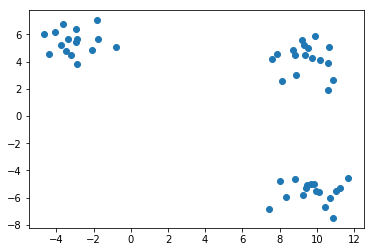

In [5]:
samples, labels = make_blobs(n_samples=50, centers=N_CLUSTERS, random_state=24)
plt.scatter(samples[:,0], samples[:,1])

In [6]:
import random

from deap import base
from deap import creator
from deap import tools
from deap.algorithms import eaSimple

creator.create('Fitness', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.Fitness)

toolbox = base.Toolbox()
toolbox.register('attr_int', random.randint, 0, N_CLUSTERS-1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_int, 50)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

[2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0]


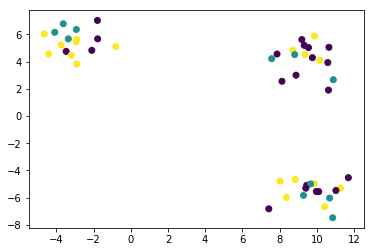

In [7]:
individual = toolbox.individual()
print(individual)
plt.scatter(samples[:,0], samples[:,1], c=individual);

In [8]:
def cost_function(vec):
    vec = np.array(vec)
    total = 0
    for i in range(0, N_CLUSTERS):
        sample = samples[vec == i]
        total += np.trace(np.cov(sample[:, 0], sample[:, 1]))
    return (total,)

In [9]:

toolbox.register('evaluate', cost_function)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutUniformInt, low=0, up=N_CLUSTERS-1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

random.seed(0)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(5)

In [10]:
%%time
pop, log = eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=30, halloffame=hof, verbose=False)

CPU times: user 7.23 s, sys: 188 ms, total: 7.42 s
Wall time: 3.74 s


(6.091936917565591,)


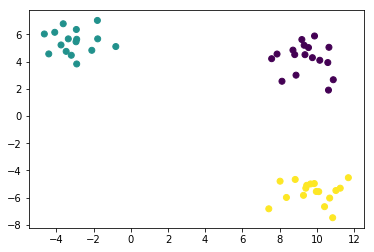

In [11]:
plt.scatter(samples[:,0], samples[:,1], c=hof[0])
print(cost_function(hof[0]))

In [12]:
import graphviz

def plot_graph(expr, size=8):

    nodes, edges, labels = graph(expr)
    dot = graphviz.Graph()
    dot.attr(size=str(size))

    for i in nodes:
        dot.node(str(i), str(labels[i]))

    for from_node, to_node in edges:
        dot.edge(str(from_node), str(to_node))
    
    return dot

def plot_graphs(expr_a, expr_b, size=8):
    
    dot = graphviz.Graph()
    dot.attr(size=str(size))

    for expr, prefix in zip([expr_a, expr_b], ['a', 'b']):
        nodes, edges, labels = graph(expr)
        for i in nodes:
            dot.node(prefix + str(i), str(labels[i]))

        for from_node, to_node in edges:
            dot.edge(prefix + str(from_node), prefix + str(to_node))
    return dot
    
    

# Genetický algoritmus vs. genetické programovanie

In [13]:
print(hof[0])

[2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0]


In [14]:
import operator, random
from deap.gp import PrimitiveSet, PrimitiveTree, genHalfAndHalf, graph, genFull


pset = PrimitiveSet("main", 2)
pset.addPrimitive(max, 2)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.mul, 2)
pset.renameArguments(ARG0="x1")
pset.renameArguments(ARG1="x2")
random.seed(7)
expr = genFull(pset, min_=1, max_=3)
tree = PrimitiveTree(expr)


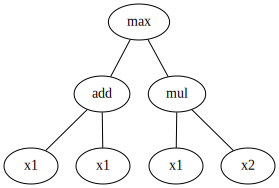

In [15]:
plot_graph(expr, 4)

![ast](ast.png)

![html](https://www.w3schools.com/js/pic_htmltree.gif)

# GP - kríženie stromov

In [16]:
from deap.gp import cxOnePoint
random.seed(2)
a = genHalfAndHalf(pset, min_=1, max_=2)
b = genHalfAndHalf(pset, min_=1, max_=2)

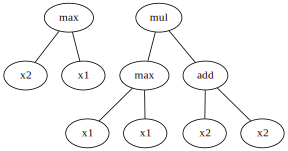

In [17]:
plot_graphs(a, b, 4)

In [18]:
random.seed(123)

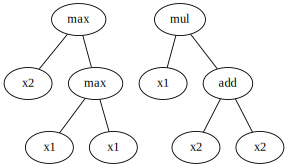

In [19]:
child_a, child_b = cxOnePoint(PrimitiveTree(a), PrimitiveTree(b))
plot_graphs(child_a, child_b, 4)

# GP - mutácia stromov 1

In [20]:
from deap.gp import mutUniform
def expr_gen(pset, type_):
    return genHalfAndHalf(pset, min_=1, max_=2)
random.seed(2)

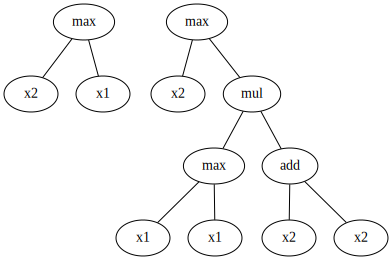

In [21]:
parent = genHalfAndHalf(pset,min_=1, max_=2)
child = mutUniform(PrimitiveTree(parent), expr_gen, pset)
plot_graphs(parent, child[0], 6)

# GP - mutácia stromov 2

In [22]:
from deap.gp import mutNodeReplacement
from copy import deepcopy
random.seed(6)

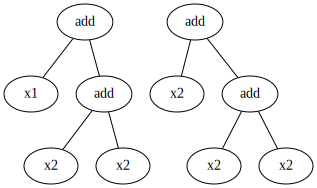

In [23]:
parent = genHalfAndHalf(pset,min_=1, max_=2)
child = mutNodeReplacement(deepcopy(parent), pset)
dots = plot_graphs(parent, child[0]); dots

# Genetické programovanie

- množina terminálov
- množina neterminálov (funkcií)
- ako zvoliť tieto množiny?

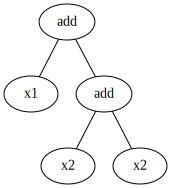

In [24]:
plot_graph(parent)

# Genetické programovanie

- jedinec reprezentuje funkciu
  - $ f(x_1, x_2) = x_1 + (x_2 + x_2) $
- nezávislé premenné (vstupy) a nezávislé premenné (výstupy)
- cieľ: nájsť funkciu, ktorá minimalizuje rozdiel (typicky suma štvorcov) medzi vstupnými trénovacími dátami a výstupnými trénovacími dátami
- Symbolická regresia (Koza, 1992) ako všeobecná forma regresnej analýzy

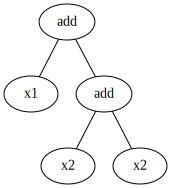

In [25]:
plot_graph(parent)

# Symbolická regresia

- lineárna regresia
 - $ y = ax + b $
- polynomiálna regresia
 - $ y = ax^2 + bx + c $
 - $ y = ax^3 + bx^2 + cx = d $
 - ...
- symbolická regresia
 - ???

<div style="display: flex; justify-content: space-around">
    <img src="linreg.png" style="width: 40%">
    <img src="polreg.png" style="width: 40%">
</div>

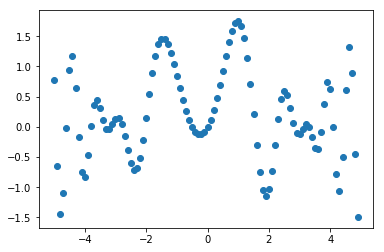

In [26]:
from pycgp.benchmarks.symbolic import X, y
plt.scatter(X, y);

Body generované funkciou $ f(x) = \sin{(x^2)} + \sin{(x + x^2)} $

In [27]:
import math
from deap import gp

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(math.sin, 1)

In [28]:
creator.create("FitnessMinGp", base.Fitness, weights=(-1.0,))
creator.create("IndividualGp", gp.PrimitiveTree, fitness=creator.FitnessMinGp)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.IndividualGp, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [29]:
def evalSymbReg(individual, points):
    func = toolbox.compile(expr=individual)
    sqerrors = ((func(x) - (math.sin(x**2) + math.sin(x + x**2) ))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-50,50)])
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

In [30]:
%%time 

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
pop, log = eaSimple(pop, toolbox, 0.7, 0.1, 200, halloffame=hof, verbose=False)

CPU times: user 35.2 s, sys: 297 ms, total: 35.5 s
Wall time: 38.1 s


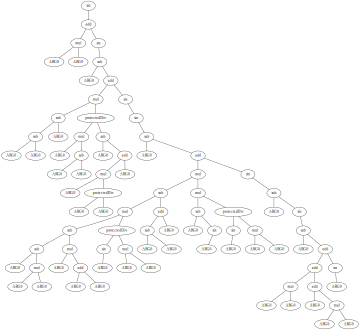

In [31]:
plot_graph(hof[0], 5)

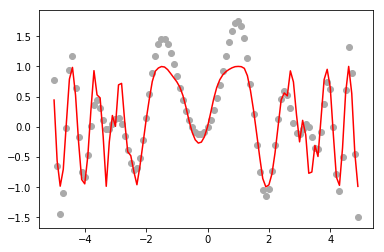

In [32]:
func = toolbox.compile(expr=hof[0])
plt.scatter(X, y, c='#aaaaaa')
plt.plot(X, [func(x[0]) for x in X], c='red');

# Čo ďalej?
Symbolická regresia nie je jediný prípad použitia:
- klasifikácia
- predikcia
- syntéza programov
- Dizajn dosiek plošných spojov
- Evolúcia neurónových sietí
- ....
 


# Výzvy v genetickom programovaní


- **nafúknutosť (z angl. bloat)**
 - tvrdé ohraničenia
 - tlak na tvorbu malých jedincov

- **konštanty**
 - efemerálna konštanta
 - symbolická konštanta

- rôzne typy premenných

- syntaktická správnosť

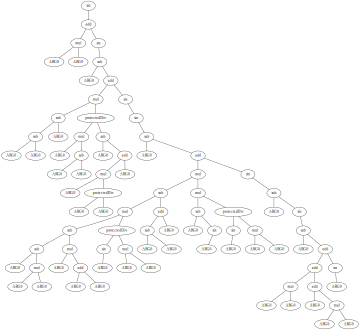

In [33]:
plot_graph(hof[0], 5)

# Musíme pracovať len so stromom?

# Lineárne genetické programovanie

- jedinec nie je dátová štruktúra, ale lineárny reťazec (genotyp)
 - čísel, inštrukcií
- kríženie a mutácia sa vykonávajú na lineárnom reťazci
 - podobnosť s genetickým algoritmom
- vykonateľná dátová štruktúra, alebo program (fenotyp) sa vytvára pomocou mapovacieho procesu

# Karteziánske genetické programovanie

![cgp1](cgp1.png)

![CGP2](cgp2.png)

# Symbolická regresia reloaded


In [34]:
from pycgp.evolution import evolution
from pycgp.mutation import probabilistic_mutation
from pycgp.benchmarks.symbolic import X, y, PARAMS, EV_PARAMS
from pycgp import Params, EvParams
PARAMS['funset']

{0: <function pycgp.benchmarks.symbolic.add>,
 1: <function pycgp.benchmarks.symbolic.mul>,
 2: <function pycgp.benchmarks.symbolic.pdiv>,
 3: <function pycgp.benchmarks.symbolic.sub>,
 4: <function pycgp.benchmarks.symbolic.plog>,
 5: <function pycgp.benchmarks.symbolic.sin>,
 6: <function pycgp.benchmarks.symbolic.cos>}

In [35]:
%%time

ev_params = EvParams(EV_PARAMS['cost_func'], target_fitness=0, mutation=probabilistic_mutation, max_evaluations=10000)
params = Params(1, 1, n_columns=23, funset=PARAMS['funset'])

random.seed(2)
result = evolution(params, ev_params, X, y)

CPU times: user 16.5 s, sys: 172 ms, total: 16.6 s
Wall time: 17.2 s


Train error: 0.0000
add(sin(mul(x0,x0)),sin(add(x0,mul(x0,x0))))


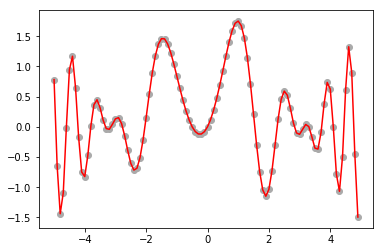

In [36]:
best = result['stats']['best']
print('Train error: {:.4f}'.format(best.fitness))
print(best)

plt.scatter(X, y, c='#aaaaaa')
plt.plot(X, best.execute(X), c='red');

<img style="width:70%" src="https://raw.githubusercontent.com/Jarino/bd-seminar-gp/master/symbolic-regression-best-individual.png">

# Špička ľadovca


|              | GP využívajúce stromy                       | Lineárne GP |
| --- | --- | --- |
| **Bez gramatík** | Štandardné GP (Koza, 1992)                  | Lineárne GP (Banzaf, 1993) |
|              | Sémantické GP (Jackson, 2010)               | Karteziánske GP (Miller, 2000) |
|              | Štatistické GP (Haeri, 2014)                |  |
|              | Geometricko-sémantické GP (Vanneschi, 2017) |  |
| **S gramatikou** | GP s bezkontextovými gramatikami (Whigham, 1995) | Gramatická evolúcia (Ryan, 1998) |

# Na čom robíme my

- **Karteziánske GP**
- aplikácia gemov na zrýchlenie konvergenice
- aplikácia Karteziánskeho GP pri výskume Alzheimerovej choroby

![mri](https://tadpole.grand-challenge.org/site/TADPOLE/serve/public_html/pet.jpg/)

# Zhrnutie

- GP je flexibilný nástroj pre mnoho úloh
 - Extrakcia čŕt (Khayam 2014)
 - Evolúcia neurónových sietí (Khan 2017)
 - Klasifikácia (Ahmad 2014)
 - Zhlukovanie (Lensen, 2017)
 - Symbolická regresia (Izzo 2017)
 - ...
- Vysoká výpočtová náročnosť

# Referencie
- KOZA, J.R. Genetic programming: on the programming of computers by means of natural selection. . [s.l.]: MIT press, 1992.
- KHAYAM, U. et al. Features Extraction of Growth Trend in Social Websites Using Non-linear Genetic Programming. In ILIADIS, L. et al.Ed. Artificial Intelligence Applications and Innovations: 10th IFIP WG 12.5 International Conference, AIAI 2014, Rhodes, Greece, September 19-21, 2014. Proceedings [online]. Berlin, Heidelberg: Springer Berlin Heidelberg, 2014. s. 414–423. ISBN 978-3-662-44654-6Dostupné na internete: https://doi.org/10.1007/978-3-662-44654-6_41
- KHAN, M.M. et al. Evolving multi-dimensional wavelet neural networks for classification using Cartesian Genetic Programming. In Neurocomputing [online]. 2017. Vol. 247, no. Supplement C, s. 39–58. Dostupné na internete: http://www.sciencedirect.com/science/article/pii/S0925231217305635
- AHMAD, A.M. et al. Classification of Mammograms Using Cartesian Genetic Programming Evolved Artificial Neural Networks. In ILIADIS, L. et al.Ed. Artificial Intelligence Applications and Innovations: 10th IFIP WG 12.5 International Conference, AIAI 2014, Rhodes, Greece, September 19-21, 2014. Proceedings [online]. Berlin, Heidelberg: Springer Berlin Heidelberg, 2014. s. 203–213. ISBN 978-3-662-44654-6Dostupné na internete: https://doi.org/10.1007/978-3-662-44654-6_20
- LENSEN, A. et al. GPGC: Genetic Programming for Automatic Clustering Using a Flexible Non-hyper-spherical Graph-based Approach. In Proceedings of the Genetic and Evolutionary Computation Conference [online]. New York, NY, USA: ACM, 2017. s. 449–456. Dostupné na internete: <http://doi.acm.org/10.1145/3071178.3071222>.
- IZZO, D. et al. Differentiable Genetic Programming. In MCDERMOTT, J. et al.Ed. Genetic Programming: 20th European Conference, EuroGP 2017, Amsterdam, The Netherlands, April 19-21, 2017, Proceedings [online]. Cham: Springer International Publishing, 2017. s. 35–51. ISBN 978-3-319-55696-3Dostupné na internete: <https://doi.org/10.1007/978-3-319-55696-3_3>.


# Zdroje
- **Info**
 - http://geneticprogramming.com/tutorial/ 
 - http://www.cartesiangp.co.uk/
 - http://cswww.essex.ac.uk/staff/poli/gp-field-guide/toc.html 
- **Software**
 - https://github.com/DEAP/deap
 - https://github.com/trevorstephens/gplearn
 - https://github.com/Ohjeah/cartesian
 - https://github.com/AndrewJamesTurner/CGP-Library
 - https://epistasislab.github.io/ellyn/
